# *Logistic Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## A psychological study has been conducted by a team of students at a University on married couples to determine the cause and effect on their married life and why they tend to have an extra marital affair, they have surveyed and collected a sample of data on which they would like to do further analysis to improve the relationship bond between couple, is it even possible to do so? Using your skills of Machine Learning apply Logistic Regression Model on the data and correctly classify whether a given person will have an affair or not given the set of attributes. 

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model to classify whether a given person will have an affair or not given the set of attributes.

## -------------------------------------------------------------------------------------------

## import libraries:

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## import dataset:

In [8]:
data = pd.read_csv(r"G:\360digit\assignments meterial\logistic regression\Affairs.csv")

In [9]:
data.head()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [10]:
df = data.drop('Unnamed: 0', axis = 1)

In [13]:
df.columns

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [14]:
df.describe()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,3.298758,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.isna().sum()

naffairs    0
kids        0
vryunhap    0
unhap       0
avgmarr     0
hapavg      0
vryhap      0
antirel     0
notrel      0
slghtrel    0
smerel      0
vryrel      0
yrsmarr1    0
yrsmarr2    0
yrsmarr3    0
yrsmarr4    0
yrsmarr5    0
yrsmarr6    0
dtype: int64

this dataset is free of missingness

In [17]:
df['naffairs'] = (df['naffairs'] >= 1 ).astype(int)

In [20]:
df.naffairs.head()

0    0
1    0
2    1
3    0
4    1
Name: naffairs, dtype: int32

### EDA:

<AxesSubplot:>

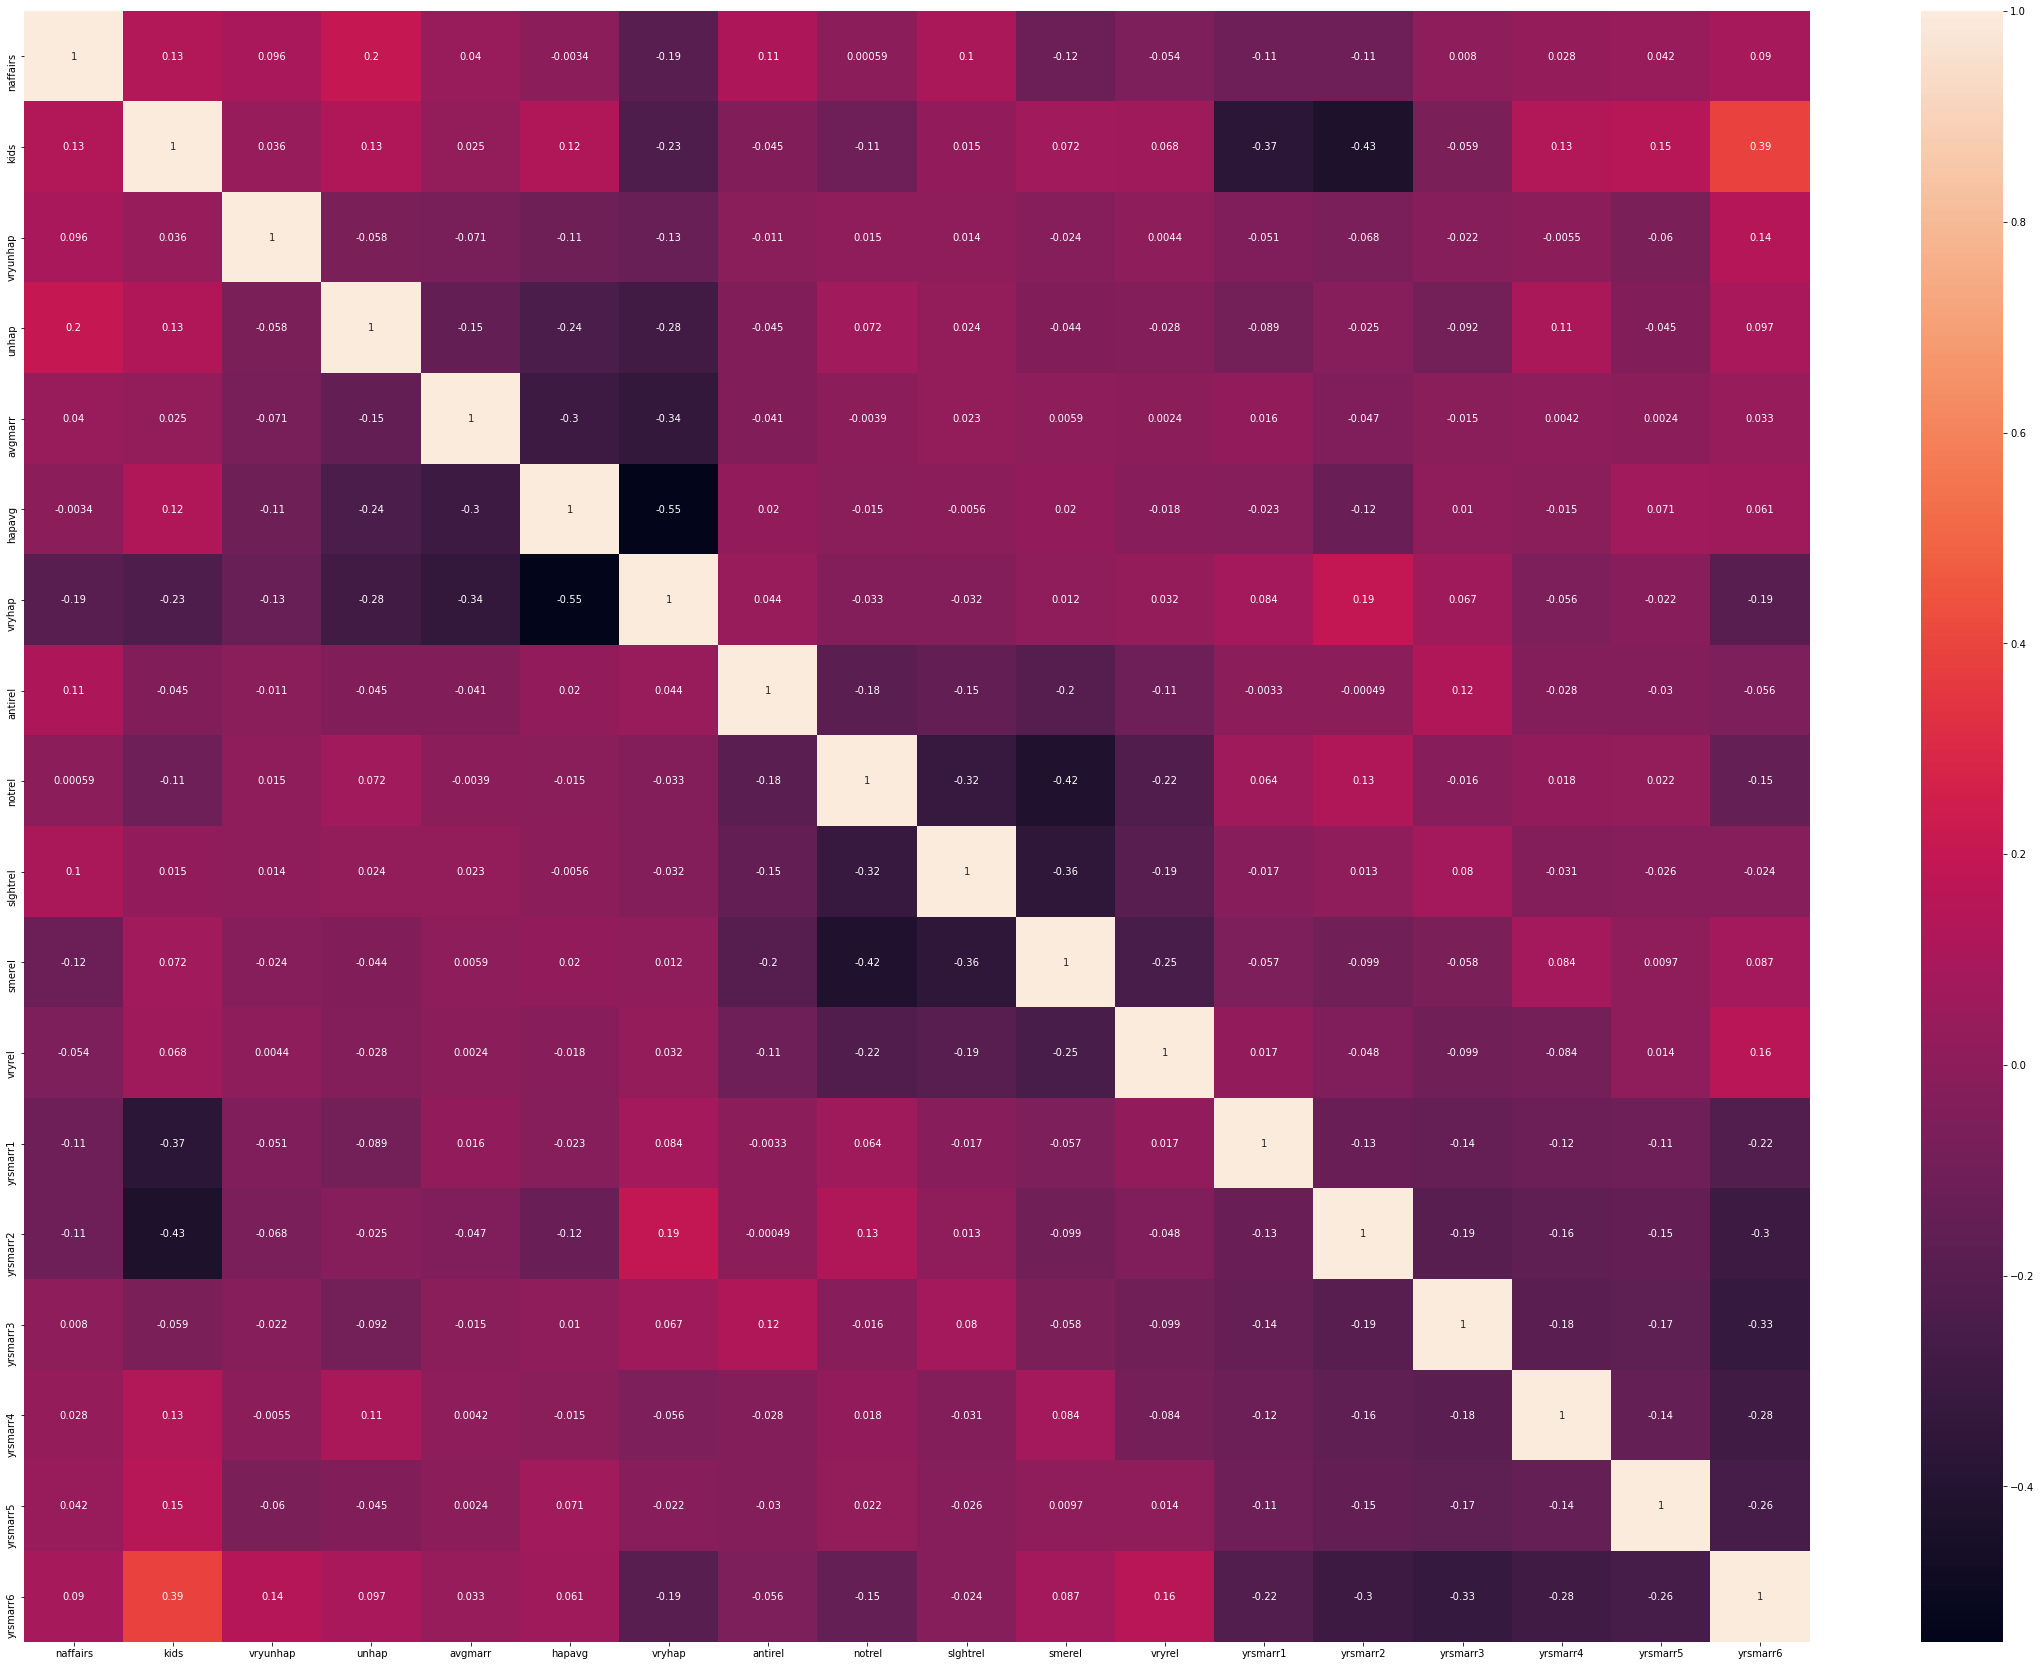

In [25]:
# Making a heatmap to find correlation
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

In [26]:
df.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


#### How children affects the husband-wife relationship.

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


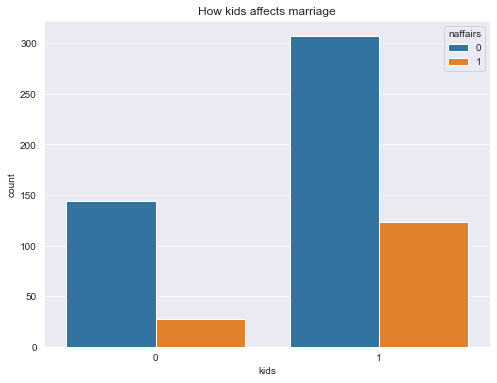

In [27]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("kids",data=df,hue="naffairs")
plt.title("How kids affects marriage")
plt.show()

most of the people with kids tend to have more affairs than others.

#### How unhappiness affects the husband-wife relationship.

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


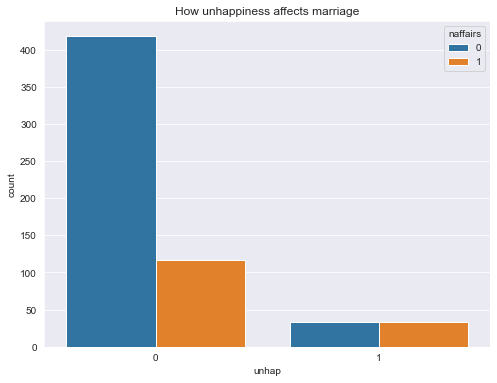

In [28]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("unhap",data=df,hue="naffairs")
plt.title("How unhappiness affects marriage")
plt.show()

<AxesSubplot:>

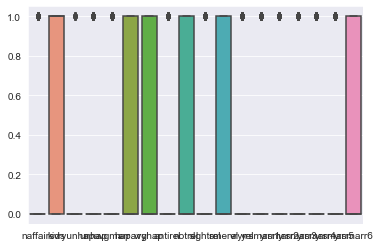

In [36]:
sns.boxplot(data =df)

Most of the people who are unhappy, are having an affair.

## Model building:

In [38]:
df.columns

Index(['naffairs', 'kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap',
       'antirel', 'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1',
       'yrsmarr2', 'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6'],
      dtype='object')

In [39]:
import statsmodels.formula.api as sm
logit_model = sm.logit('naffairs ~ kids + vryunhap + unhap + avgmarr + hapavg + vryhap + antirel + notrel + slghtrel + smerel + vryrel + yrsmarr1 + yrsmarr2 + yrsmarr3 + yrsmarr4 + yrsmarr5 + yrsmarr6' , data = df).fit()

Optimization terminated successfully.
         Current function value: 0.501009
         Iterations 18


In [40]:
logit_model.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.108     
Dependent Variable:    naffairs            AIC:                 632.2126  
Date:                  2021-04-20 00:01    BIC:                 698.1915  
No. Observations:      601                 Log-Likelihood:      -301.11   
Df Model:              14                  LL-Null:             -337.69   
Df Residuals:          586                 LLR p-value:         5.1293e-10
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        18.0000                                            
--------------------------------------------------------------------------
           Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------
Intercept -0.6174 8983955.2785 -0.0000 1.0000 -17608229.4020 17608228.1671
kids       0.1727       0.3110  0.5555 0.5785        -0.4367        0.7822
vryunhap   0.5130          nan     nan    nan            nan           nan
unhap      0.6187          nan     nan    nan            nan           nan
avgmarr   -0.2178          nan     nan    nan            nan           nan
hapavg    -0.5264          nan     nan    nan            nan           nan
vryhap    -1.0049          nan     nan    nan            nan           nan
antirel    0.7815          nan     nan    nan            nan           nan
notrel    -0.2052          nan     nan    nan            nan           nan
slghtrel   0.1848          nan     nan    nan            nan           nan
smerel    -0.7377          nan     nan    nan            nan           nan
vryrel    -0.6408          nan     nan    nan            nan           nan
yrsmarr1  -0.8579          nan     nan    nan            nan           nan
yrsmarr2  -0.5608          nan     nan    nan            nan           nan
yrsmarr3   0.0635          nan     nan    nan            nan           nan
yrsmarr4   0.0891          nan     nan    nan            nan           nan
yrsmarr5   0.4088          nan     nan    nan            nan           nan
yrsmarr6   0.2399          nan     nan    nan            nan           nan
==========================================================================

"""

In [41]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               naffairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           14
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:                  0.1083
Time:                        00:01:22   Log-Likelihood:                -301.11
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 5.129e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6174   8.98e+06  -6.87e-08      1.000   -1.76e+07    1.76e+07
kids           0.1727      0.311      0.556      0.579      -0.437       0.782
vryunhap       0.5130        nan        nan        nan         nan         nan
unhap          0.6187        nan        nan        nan         nan         nan
avgmarr       -0.2178        nan        nan        nan         nan         nan
hapavg        -0.5264        nan        nan        nan         nan         nan
vryhap        -1.0049        nan        nan        nan         nan         nan
antirel        0.7815        nan        nan        nan         nan         nan
notrel        -0.2052        nan        nan        nan         nan         nan
slghtrel       0.1848        nan        nan        nan         nan         nan
smerel        -0.7377        nan        nan        nan         nan         nan
vryrel        -0.6408        nan        nan        nan         nan         nan
yrsmarr1      -0.8579        nan        nan        nan         nan         nan
yrsmarr2      -0.5608        nan        nan        nan         nan         nan
yrsmarr3       0.0635        nan        nan        nan         nan         nan
yrsmarr4       0.0891        nan        nan        nan         nan         nan
yrsmarr5       0.4088        nan        nan        nan         nan         nan
yrsmarr6       0.2399        nan        nan        nan         nan         nan
==============================================================================
"""

In [43]:
pred = logit_model.predict(df.iloc[ :, 1: ])

In [47]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(df.naffairs, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.252157157013533

In [48]:
import pylab as pl

In [49]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
61,0.312639,0.673333,0.687361,-0.014028,0.24517


[Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, ''),
 Text(140.0, 0, ''),
 Text(160.0, 0, '')]

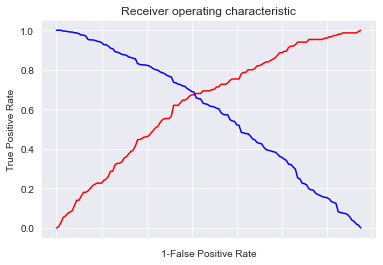

In [50]:
# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'], color = 'red')
pl.plot(roc['1-fpr'], color = 'blue')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])


In [53]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.720880


In [56]:
df.shape

(601, 18)

In [57]:
# filling all the cells with zeroes
df["pred"] = np.zeros(601)

In [59]:
# taking threshold value and above the prob value will be treated as correct value 
df.loc[pred > optimal_threshold, "pred"] = 1

In [61]:
# classification report
classification = metrics.classification_report(df["pred"], df["naffairs"])
classification

'              precision    recall  f1-score   support\n\n         0.0       0.71      0.86      0.77       370\n         1.0       0.65      0.42      0.51       231\n\n    accuracy                           0.69       601\n   macro avg       0.68      0.64      0.64       601\nweighted avg       0.69      0.69      0.67       601\n'

### Splitting the data into train and test data: 

In [62]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.3) # 30% test data

In [63]:
# Model building 
# import statsmodels.formula.api as sm
model = sm.logit('naffairs ~ kids + vryunhap + unhap + avgmarr + hapavg + vryhap + antirel + notrel + slghtrel + smerel + vryrel + yrsmarr1 + yrsmarr2 + yrsmarr3 + yrsmarr4 + yrsmarr5 + yrsmarr6', data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.484917
         Iterations 7


In [64]:
#summary
model.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Pseudo R-squared:    0.121     
Dependent Variable:     naffairs            AIC:                 437.3301  
Date:                   2021-04-20 00:14    BIC:                 497.9340  
No. Observations:       420                 Log-Likelihood:      -203.67   
Df Model:               14                  LL-Null:             -231.68   
Df Residuals:           405                 LLR p-value:         5.7385e-07
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
           Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------
Intercept -0.7513           nan     nan    nan            nan           nan
kids       0.2283        0.3969  0.5753 0.5651        -0.5496        1.0062
vryunhap   0.3451  5342420.3214  0.0000 1.0000 -10470951.0751 10470951.7654
unhap      0.6386  5342420.3214  0.0000 1.0000 -10470950.7816 10470952.0588
avgmarr   -0.2625  5342420.3214 -0.0000 1.0000 -10470951.6827 10470951.1577
hapavg    -0.4486  5342420.3214 -0.0000 1.0000 -10470951.8688 10470950.9716
vryhap    -1.0239  5342420.3214 -0.0000 1.0000 -10470952.4441 10470950.3963
antirel    0.6065 20321246.3758  0.0000 1.0000 -39828910.4110 39828911.6241
notrel    -0.2597 20321246.3758 -0.0000 1.0000 -39828911.2772 39828910.7578
slghtrel   0.1811 20321246.3758  0.0000 1.0000 -39828910.8365 39828911.1986
smerel    -0.8085 20321246.3758 -0.0000 1.0000 -39828911.8260 39828910.2091
vryrel    -0.4708 20321246.3758 -0.0000 1.0000 -39828911.4883 39828910.5467
yrsmarr1  -0.8618 26196618.1092 -0.0000 1.0000 -51344428.8726 51344427.1491
yrsmarr2  -0.9300 26196618.1092 -0.0000 1.0000 -51344428.9408 51344427.0809
yrsmarr3   0.2730 26196618.1092  0.0000 1.0000 -51344427.7379 51344428.2839
yrsmarr4  -0.1642 26196618.1092 -0.0000 1.0000 -51344428.1751 51344427.8466
yrsmarr5   0.5050 26196618.1092  0.0000 1.0000 -51344427.5059 51344428.5158
yrsmarr6   0.4266 26196618.1092  0.0000 1.0000 -51344427.5842 51344428.4375
===========================================================================

"""

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               naffairs   No. Observations:                  420
Model:                          Logit   Df Residuals:                      405
Method:                           MLE   Df Model:                           14
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:                  0.1209
Time:                        00:14:41   Log-Likelihood:                -203.67
converged:                       True   LL-Null:                       -231.68
Covariance Type:            nonrobust   LLR p-value:                 5.738e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7513        nan        nan        nan         nan         nan
kids           0.2283      0.397      0.575      0.565      -0.550       1.006
vryunhap       0.3451   5.34e+06   6.46e-08      1.000   -1.05e+07    1.05e+07
unhap          0.6386   5.34e+06    1.2e-07      1.000   -1.05e+07    1.05e+07
avgmarr       -0.2625   5.34e+06  -4.91e-08      1.000   -1.05e+07    1.05e+07
hapavg        -0.4486   5.34e+06   -8.4e-08      1.000   -1.05e+07    1.05e+07
vryhap        -1.0239   5.34e+06  -1.92e-07      1.000   -1.05e+07    1.05e+07
antirel        0.6065   2.03e+07   2.98e-08      1.000   -3.98e+07    3.98e+07
notrel        -0.2597   2.03e+07  -1.28e-08      1.000   -3.98e+07    3.98e+07
slghtrel       0.1811   2.03e+07   8.91e-09      1.000   -3.98e+07    3.98e+07
smerel        -0.8085   2.03e+07  -3.98e-08      1.000   -3.98e+07    3.98e+07
vryrel        -0.4708   2.03e+07  -2.32e-08      1.000   -3.98e+07    3.98e+07
yrsmarr1      -0.8618   2.62e+07  -3.29e-08      1.000   -5.13e+07    5.13e+07
yrsmarr2      -0.9300   2.62e+07  -3.55e-08      1.000   -5.13e+07    5.13e+07
yrsmarr3       0.2730   2.62e+07   1.04e-08      1.000   -5.13e+07    5.13e+07
yrsmarr4      -0.1642   2.62e+07  -6.27e-09      1.000   -5.13e+07    5.13e+07
yrsmarr5       0.5050   2.62e+07   1.93e-08      1.000   -5.13e+07    5.13e+07
yrsmarr6       0.4266   2.62e+07   1.63e-08      1.000   -5.13e+07    5.13e+07
==============================================================================
"""

In [66]:
# Prediction on Test data set
test_pred = logit_model.predict(test_data)

In [68]:
test_data.shape

(181, 19)

In [69]:
# Creating new column for storing predicted class ofnaffairs
# filling all the cells with zeroes
test_data["test_pred"] = np.zeros(181)

<ipython-input-69-8b271c1cb430>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["test_pred"] = np.zeros(181)


In [70]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 
test_data.loc[test_pred > optimal_threshold, "test_pred"] = 1

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [71]:
# confusion matrix 
confusion_matrix = pd.crosstab(test_data.test_pred, test_data['naffairs'])
confusion_matrix

naffairs,0,1
test_pred,,
0.0,96,18
1.0,36,31


In [88]:
metrics.accuracy_score(test_data.test_pred, test_data['naffairs'])

0.7016574585635359

In [74]:
# classification report
classification_test = metrics.classification_report(test_data["test_pred"], test_data["naffairs"])
classification_test

'              precision    recall  f1-score   support\n\n         0.0       0.73      0.84      0.78       114\n         1.0       0.63      0.46      0.53        67\n\n    accuracy                           0.70       181\n   macro avg       0.68      0.65      0.66       181\nweighted avg       0.69      0.70      0.69       181\n'

In [75]:
#ROC CURVE AND AUC
fpr, tpr, threshold = metrics.roc_curve(test_data["naffairs"], test_pred)

Text(0, 0.5, 'True positive rate')

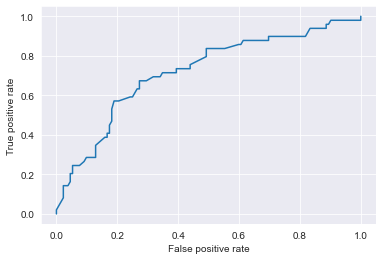

In [76]:
#PLOT OF ROC
plt.plot(fpr, tpr);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [77]:
roc_auc_test = metrics.auc(fpr, tpr)
roc_auc_test

0.7182282003710575

In [78]:
# prediction on train data
train_pred = model.predict(train_data.iloc[ :, 1: ])

In [79]:
train_data.shape

(420, 19)

In [80]:
# Creating new column 
# filling all the cells with zeroes
train_data["train_pred"] = np.zeros(420)

<ipython-input-80-9d82a0281960>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["train_pred"] = np.zeros(420)


In [81]:
# taking threshold value and above the prob value will be treated as correct value 
train_data.loc[train_pred > optimal_threshold, "train_pred"] = 1

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [83]:
# confusion matrix
confusion_matrx = pd.crosstab(train_data.train_pred, train_data['naffairs'])
confusion_matrx

naffairs,0,1
train_pred,,
0.0,216,32
1.0,103,69


In [84]:
metrics.accuracy_score(train_data.train_pred, train_data['naffairs'])

0.6785714285714286

first model has better accuracy than the later model